In [104]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import cm # color map

from sympy import symbols, diff
from math import log

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

# Example 1 - A simple cost function

## $f(x)=x^2+x+1$ 

In [105]:
def f(x):
    return x**2+x+1

In [106]:
# Make Data
x_1 = np.linspace(start=-3,stop=3,num=500)
# x_1

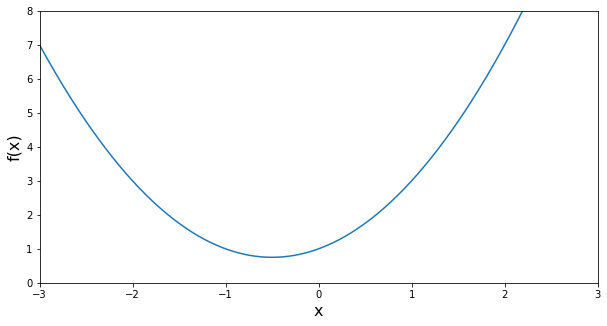

In [107]:
plt.figure(figsize=[10,5])
plt.plot(x_1,f(x_1))
plt.xlim([-3,3])
plt.ylim(0,8)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)
plt.show()

In [108]:
## Slope and Derivative
def df(x):
    return 2*x+1

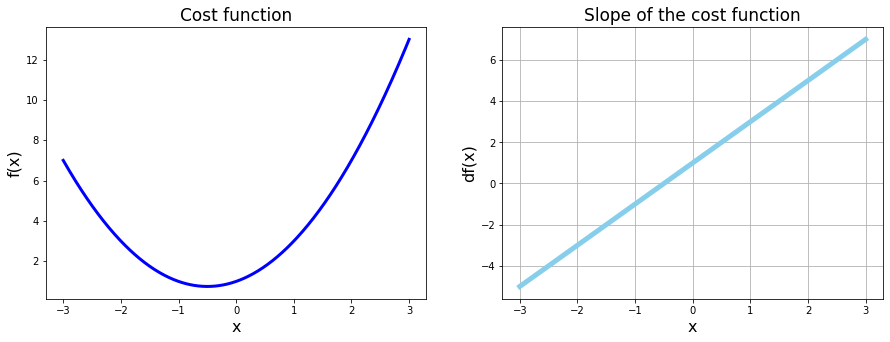

In [109]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
# plt.xlim([-3,3])
# plt.ylim(0,8)
plt.title('Cost function',fontsize=17)
plt.xlabel('x',fontsize=16)
plt.ylabel('f(x)',fontsize=16)
plt.plot(x_1,f(x_1),color='blue',linewidth=3)

plt.subplot(1,2,2)
# plt.xlim(-2,3)
# plt.ylim(-3,6)
plt.grid()
plt.title('Slope of the cost function',fontsize=17)
plt.xlabel('x',fontsize=16)
plt.ylabel('df(x)',fontsize=16)
plt.plot(x_1,df(x_1),color='skyblue',linewidth=5)
plt.show()

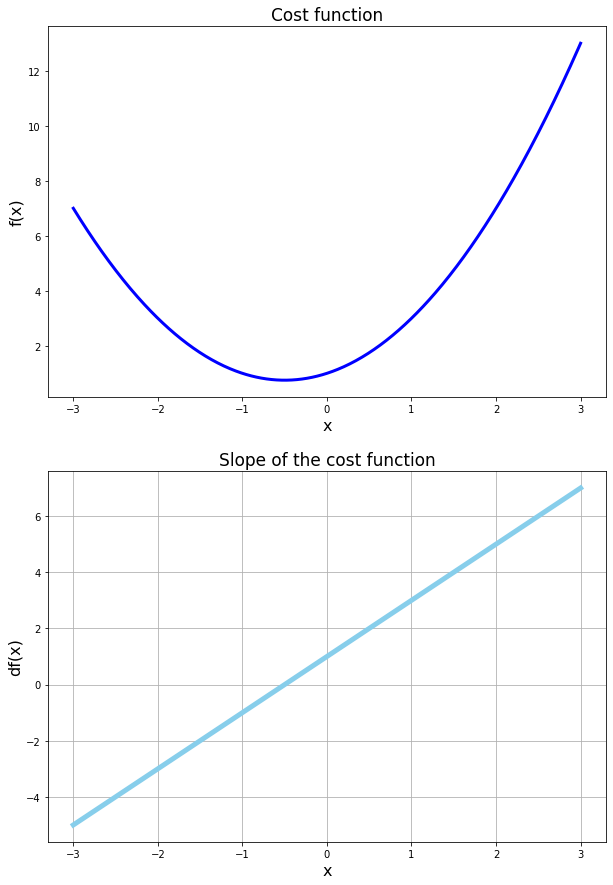

In [110]:
plt.figure(figsize=[10,15])

plt.subplot(2,1,1)
# plt.xlim([-3,3])
# plt.ylim(0,8)
plt.title('Cost function',fontsize=17)
plt.xlabel('x',fontsize=16)
plt.ylabel('f(x)',fontsize=16)
plt.plot(x_1,f(x_1),color='blue',linewidth=3)

plt.subplot(2,1,2)
# plt.xlim(-2,3)
# plt.ylim(-3,6)
plt.title('Slope of the cost function',fontsize=17)
plt.grid()
plt.xlabel('x',fontsize=16)
plt.ylabel('df(x)',fontsize=16)
plt.plot(x_1,df(x_1),color='skyblue',linewidth=5)
plt.show()

## Python Loops & Gradient Descent

In [111]:
# Gradient Descent
new_x = 3
prev_x = 0
step_multi = 0.1
precision = 0.00001

x_list = [new_x]
slope_list = [df(new_x)]

for n in range(500):
    prev_x = new_x
    gradient = df(prev_x)
    new_x = prev_x - step_multi * gradient
    
    step = abs(new_x - prev_x)
#     print(step)
    x_list.append(new_x)
    slope_list.append(df(new_x))

    if step<precision:
        print('Loop ran this many times:',n)
        break
    
print('Local minimum occurs at:',new_x)
print('Slope or df(x) value at this point is:',df(new_x))
print('f(x) value or cost at this point is:',f(new_x))

Loop ran this many times: 50
Local minimum occurs at: -0.49996003706460423
Slope or df(x) value at this point is: 7.992587079153068e-05
f(x) value or cost at this point is: 0.7500000015970362


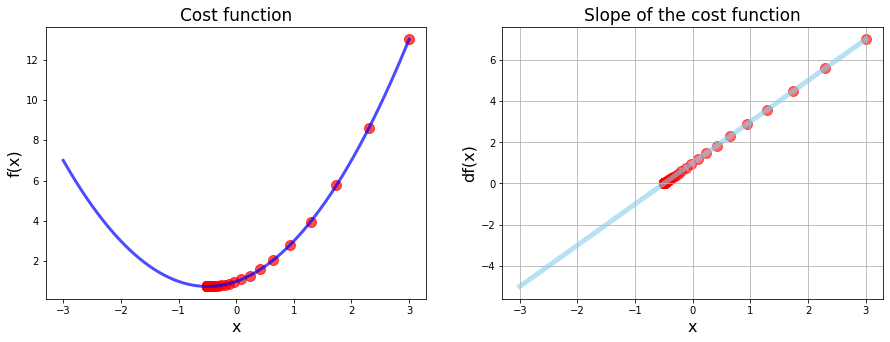

In [112]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
# plt.xlim([-3,3])
# plt.ylim(0,8)
plt.title('Cost function',fontsize=17)
plt.xlabel('x',fontsize=16)
plt.ylabel('f(x)',fontsize=16)
plt.plot(x_1,f(x_1),color='blue',linewidth=3,alpha=0.7)

values = np.array(x_list)
plt.scatter(x_list,f(values),color='red',s=100,alpha=0.7)

plt.subplot(1,2,2)
# plt.xlim(-2,3)
# plt.ylim(-3,6)
plt.grid()
plt.title('Slope of the cost function',fontsize=17)
plt.xlabel('x',fontsize=16)
plt.ylabel('df(x)',fontsize=16)
plt.plot(x_1,df(x_1),color='skyblue',linewidth=5,alpha=0.6)

plt.scatter(x_list,slope_list,color='red',s=100,alpha=0.6)
plt.show()

## Example to multiple minimum and initial guess and advance functions

## $$g(x)=x^4-4x^2+5$$

In [113]:
x_2 = np.linspace(-2,2,1000)

In [114]:
def g(x):
    return x**4-4*x**2+5

In [115]:
def dg(x):
    return 4*x**3-8*x

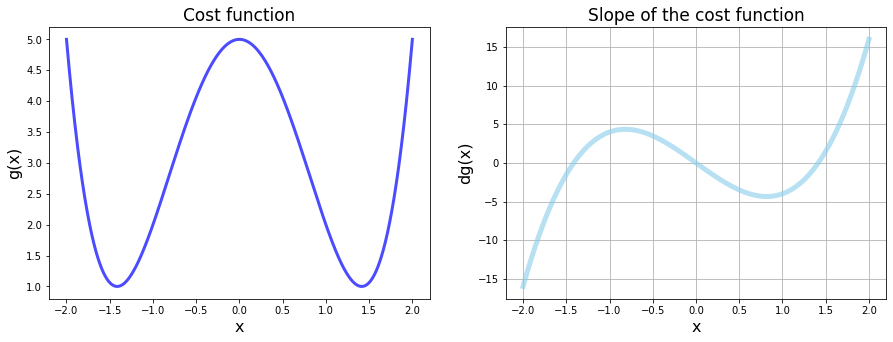

In [116]:
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
# plt.xlim([-3,3])
# plt.ylim(0,8)
plt.title('Cost function',fontsize=17)
plt.xlabel('x',fontsize=16)
plt.ylabel('g(x)',fontsize=16)
plt.plot(x_2,g(x_2),color='blue',linewidth=3,alpha=0.7)

# values = np.array(x_list)
# plt.scatter(x_list,f(values),color='red',s=100,alpha=0.7)

plt.subplot(1,2,2)
# plt.xlim(-2,3)
# plt.ylim(-3,6)
plt.grid()
plt.title('Slope of the cost function',fontsize=17)
plt.xlabel('x',fontsize=16)
plt.ylabel('dg(x)',fontsize=16)
plt.plot(x_2,dg(x_2),color='skyblue',linewidth=5,alpha=0.6)

# plt.scatter(x_list,slope_list,color='red',s=100,alpha=0.6)
plt.show()

In [117]:
# Gradient Descent as a python function
def gradient_descent(derivative_func, initial_guess,step_multi,precision):
    
    new_x = initial_guess

    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(500):
        prev_x = new_x
        gradient = derivative_func(prev_x)
        new_x = prev_x - step_multi * gradient

        step = abs(new_x - prev_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step<precision:
            break
            
    return new_x, x_list, slope_list

In [118]:
local_min, list_x, derv_x = gradient_descent(dg, 0.5, 0.02, 0.001)
print('local min:',local_min)
print('No of steps:', len(list_x))

local min: 1.4122375085019094
No of steps: 23


In [119]:
local_min, list_x, derv_x = gradient_descent(derivative_func=dg, initial_guess=0.5, step_multi=0.02, precision=0.001)
print('local min:',local_min)
print('No of steps:', len(list_x))

local min: 1.4122375085019094
No of steps: 23


In [120]:
# Gradient Descent as a python function
def gradient_descent(derivative_func, initial_guess, step_multi=0.02, precision=0.001): 
    # step_multi and precision are defaulted
    new_x = initial_guess

    x_list = [new_x]
    slope_list = [derivative_func(new_x)]

    for n in range(500):
        prev_x = new_x
        gradient = derivative_func(prev_x)
        new_x = prev_x - step_multi * gradient

        step = abs(new_x - prev_x)
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        if step<precision:
            break
            
    return new_x, x_list, slope_list

In [121]:
local_min, list_x, derv_x = gradient_descent(derivative_func=dg, initial_guess=-0.1)
print('local min:',local_min)
print('No of steps:', len(list_x))

local min: -1.4120887490901561
No of steps: 34


In [122]:
# # calling gradient descent function
# local_min, list_x, derv_x = gradient_descent(derivative_func=dg, initial_guess=0.1)

# plt.figure(figsize=[15,5])

# plt.subplot(1,2,1)
# # plt.xlim(-2,2)
# # plt.ylim(0.5,0.5)
# plt.title('Cost function',fontsize=17)
# plt.xlabel('x',fontsize=16)
# plt.ylabel('g(x)',fontsize=16)
# plt.plot(x_2,g(x_2),color='blue',linewidth=3,alpha=0.7)

# plt.scatter(list_x,g(np.array(list_x),color='red',s=100,alpha=0.7)

            
# plt.subplot(1,2,2)
            
# # plt.xlim(-2,2)
# # plt.ylim(-6,8)
# plt.grid()
# plt.title('Slope of the cost function',fontsize=17)
# plt.xlabel('x',fontsize=16)
# plt.ylabel('dg(x)',fontsize=16)
# plt.plot(x_2,dg(x_2),color='skyblue',linewidth=5,alpha=0.6)

# plt.scatter(list_x,derv_x,color='red',s=100,alpha=0.6)
# plt.show()

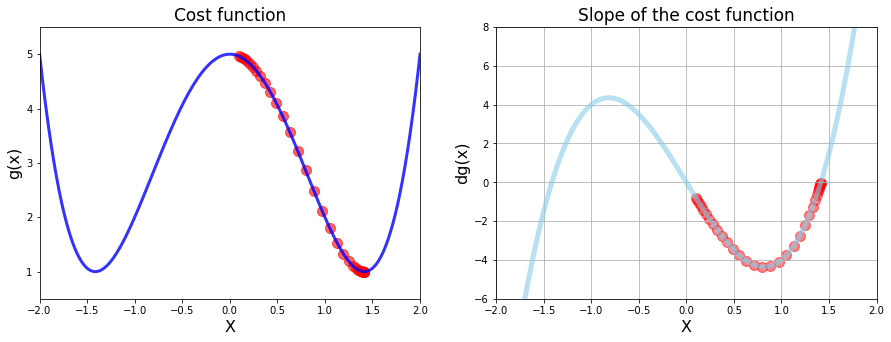

In [123]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 0.1)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-2, 2)
plt.ylim(0.5, 5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)
plt.grid()
plt.xlim(-2, 2)
plt.ylim(-6, 8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

In [124]:
# # Calling gradient descent function
# local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 1.9,
#                                                 multiplier=0.02, max_iter=500)

# # Plot function and derivative and scatter plot side by side

# plt.figure(figsize=[15, 5])

# # 1 Chart: Cost function
# plt.subplot(1, 2, 1)

# plt.xlim(-2, 2)
# plt.ylim(0.5, 5.5)

# plt.title('Cost function', fontsize=17)
# plt.xlabel('X', fontsize=16)
# plt.ylabel('g(x)', fontsize=16)

# plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.8)
# plt.scatter(list_x, g(np.array(list_x)), color='red', s=100, alpha=0.6)

# # 2 Chart: Derivative
# plt.subplot(1, 2, 2)

# plt.title('Slope of the cost function', fontsize=17)
# plt.xlabel('X', fontsize=16)
# plt.ylabel('dg(x)', fontsize=16)
# plt.grid()
# plt.xlim(-2, 2)
# plt.ylim(-6, 8)

# plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.6)
# plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

# plt.show()

# print('Number of steps is: ', len(list_x))

# Divergence Overflow and Python Tuples
## $$h(x) = x^5 - 2x^4 + 2$$

In [125]:
# Make Data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

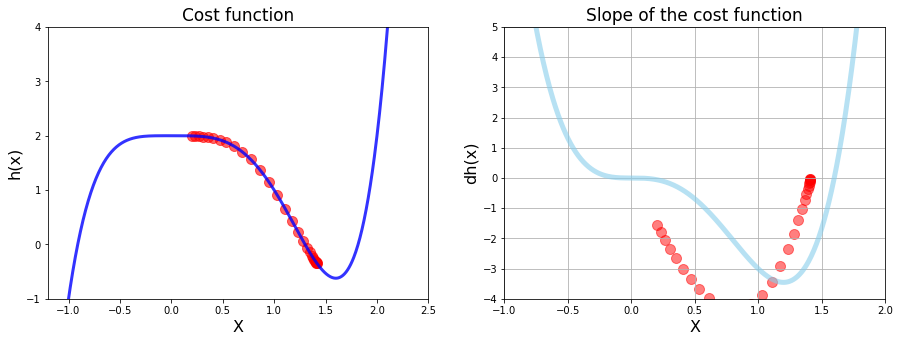

Local min occurs at:  1.4125970532782497
Cost at this minimum is:  -0.33888734845533985
Number of steps:  30


In [126]:
# Calling gradient descent function
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg, initial_guess= 0.2)

# Plot function and derivative and scatter plot side by side

plt.figure(figsize=[15, 5])

# 1 Chart: Cost function
plt.subplot(1, 2, 1)

plt.xlim(-1.2, 2.5)
plt.ylim(-1, 4)

plt.title('Cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('h(x)', fontsize=16)

plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.8)
plt.scatter(list_x, h(np.array(list_x)), color='red', s=100, alpha=0.6)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.title('Slope of the cost function', fontsize=17)
plt.xlabel('X', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)
plt.grid()
plt.xlim(-1, 2)
plt.ylim(-4, 5)

plt.plot(x_3, dh(x_3), color='skyblue', linewidth=5, alpha=0.6)
plt.scatter(list_x, deriv_list, color='red', s=100, alpha=0.5)

plt.show()

print('Local min occurs at: ', local_min)
print('Cost at this minimum is: ', h(local_min))
print('Number of steps: ', len(list_x))

In [127]:
import sys
# sys.version
# sys.float_info.max

# Data Vizualization with 3D charts
## Minimise $$f(x,y) = \frac{1}{3^{-x^2-y^2} + 1}$$
Mininmise $$f(x,y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2-y^2}$

In [128]:
def f(x,y):
    r = 3**(-x**2 - y**2)
    return 1/(r+1)

In [129]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

print('Shape of X array', x_4.shape)

x_4, y_4 = np.meshgrid(x_4, y_4)
print('Array after meshgrid: ', x_4.shape)

Shape of X array (200,)
Array after meshgrid:  (200, 200)


C:\Users\prash\AppData\Local\Temp/ipykernel_14400/1892004292.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection = '3d') # get current axis


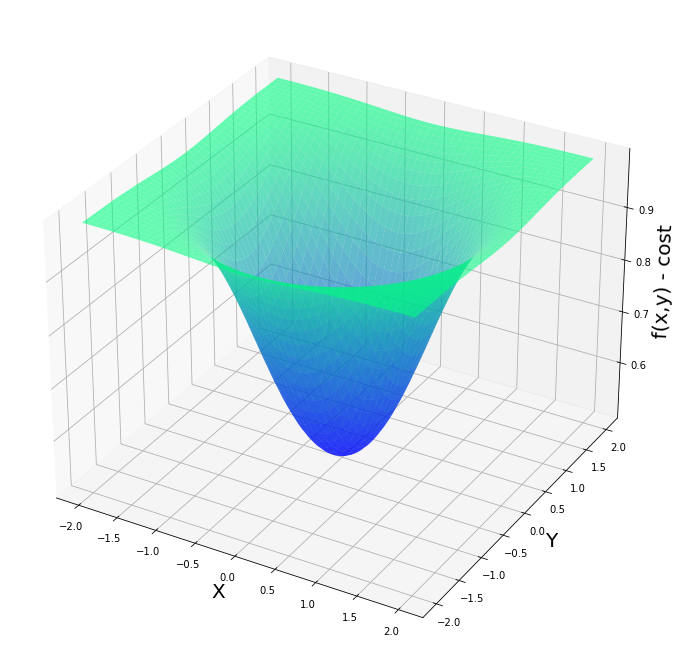

In [130]:
# Generating 3D Plot
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection = '3d') # get current axis

ax.set_xlabel('X',fontsize=20)
ax.set_ylabel('Y',fontsize=20)
ax.set_zlabel('f(x,y) - cost',fontsize=20)

ax.plot_surface(x_4,y_4,f(x_4,y_4), cmap=cm.winter, alpha=0.6)

## Partial Derivatives & Symbolic Computation

## $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 - y^2}}{\left( 3^{-x^2 - y^2} + 1 \right) ^2}$$

## $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 - y^2}}{\left( 3^{-x^2 - y^2} + 1 \right) ^2}$$

In [131]:
a, b = symbols('x, y')
print('Our cost function f(x, y) is: ', f(a, b))
print('Partial derivative wrt x is: ', diff(f(a, b), b))
print('Value of f(x,y) at x=1.8 y=1.0 is: ', 
      f(a, b).evalf(subs={a:1.8, b:1.0})) # Python Dictionary
print('Value of partial derivative wrt x: ', diff(f(a, b), a).evalf(subs={a:1.8, b:1.0}))

Our cost function f(x, y) is:  1/(3**(-x**2 - y**2) + 1)
Partial derivative wrt x is:  2*3**(-x**2 - y**2)*y*log(3)/(3**(-x**2 - y**2) + 1)**2
Value of f(x,y) at x=1.8 y=1.0 is:  0.990604794032582
Value of partial derivative wrt x:  0.0368089716197505


In [132]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = diff(f(a, b), a).evalf(subs={a:params[0], b:params[1]})
    gradient_y = diff(f(a, b), b).evalf(subs={a:params[0], b:params[1]})
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of:  3.45838599885832e-11
Minimum occurs at y value of:  1.92132555492129e-11
The cost is:  0.500000000000000


In [133]:
# Partial derivative functions example 4
def fpx(x, y):
    r = 3**(-x**2 - y**2)
    return 2*x*log(3)*r / (r + 1)**2

def fpy(x, y):
    r = 3**(-x**2 - y**2)
    return 2*y*log(3)*r / (r + 1)**2

In [134]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8, 1.0]) # initial guess

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

Values in gradient array [2.01013038e-11 1.11673910e-11]
Minimum occurs at x value of:  3.458385998858304e-11
Minimum occurs at y value of:  1.9213255549212797e-11
The cost is:  0.5


In [135]:
# Setup
multiplier = 0.1
max_iter = 200
params = np.array([1.8, 1.0]) # initial guess
values_array = params.reshape(1, 2)
print(values_array.shape)

for n in range(max_iter):
    gradient_x = fpx(params[0], params[1])
    gradient_y = fpy(params[0], params[1])
    gradients = np.array([gradient_x, gradient_y])
    params = params - multiplier * gradients
    #values_array = np.append(values_array, params.reshape(1, 2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1, 2)), axis=0)
    
    
# Results
print('Values in gradient array', gradients)
print('Minimum occurs at x value of: ', params[0])
print('Minimum occurs at y value of: ', params[1])
print('The cost is: ', f(params[0], params[1]))

(1, 2)
Values in gradient array [0.00046144 0.00025636]
Minimum occurs at x value of:  0.0007938985101347202
Minimum occurs at y value of:  0.0004410547278526219
The cost is:  0.5000002265349848


C:\Users\prash\AppData\Local\Temp/ipykernel_14400/409215740.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


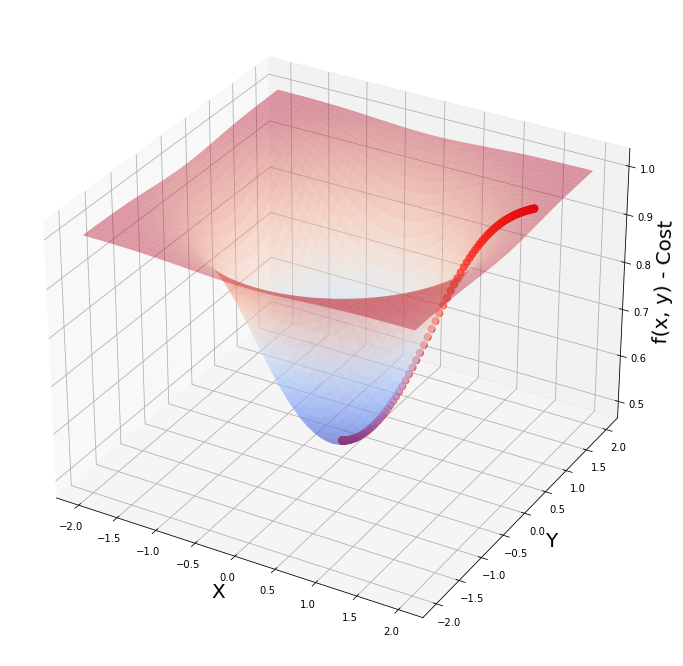

In [136]:
# Generating 3D Plot
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('X', fontsize=20)
ax.set_ylabel('Y', fontsize=20)
ax.set_zlabel('f(x, y) - Cost', fontsize=20)

ax.plot_surface(x_4, y_4, f(x_4, y_4), cmap=cm.coolwarm, alpha=0.4)
ax.scatter(values_array[:, 0], values_array[:, 1], 
           f(values_array[:, 0], values_array[:, 1]), s=50, color='red')

plt.show()

In [137]:
# Advanced Numpy Array Practice:

kirk = np.array([['Captain', 'Guitar']])
print(kirk.shape)

hs_band = np.array([['Black Thought', 'MC'], ['Questlove', 'Drums']])
print(hs_band.shape)

print('hs_band[0]  :', hs_band[0])
print('hs_band[0][1]   :', hs_band[1][0])

the_roots = np.append(arr=hs_band, values=kirk, axis=0)
print(the_roots)

print('Printing nicknames...', the_roots[:, 0])

the_roots = np.append(arr=the_roots, values=[['Malik B', 'MC']], axis=0)
print('Printing band roles ...', the_roots[:, 1])

(1, 2)
(2, 2)
hs_band[0]  : ['Black Thought' 'MC']
hs_band[0][1]   : Questlove
[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]
Printing nicknames... ['Black Thought' 'Questlove' 'Captain']
Printing band roles ... ['MC' 'Drums' 'Guitar' 'MC']


# Example 5 - Working with Data & a Real Cost Function

## Mean Squared Error: a cost function for regression problems

### $$RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)} \big)^2 $$
### $$MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y - \hat{y} \big)^2 $$

In [138]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [139]:
# Quick linear regression
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

Theta 0: 0.8475351486029536
Theta 1: 1.2227264637835915


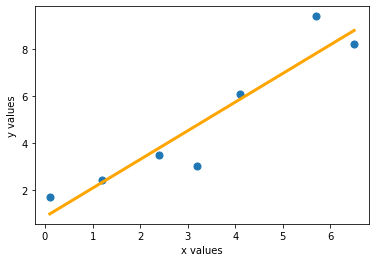

In [140]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [141]:
# y_hat = theta0 + theta1*x
y_hat = 0.847535148603 + 1.22272646378*x_5
print('Est values y_hat are: \n', y_hat)
print('In comparison, the actual y values are \n', y_5)

Est values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [142]:
# Challenge: Write a python function mse(y, y_hat) returns the MSE? Call the mse(y, y_hat)
# function and print out the MSE for the y_hat calculated above. 

def mse(y, y_hat):
    #mse_calc = 1/7 * sum((y - y_hat)**2)
    #mse_calc = (1/y.size) * sum((y - y_hat)**2)
    mse_calc = np.average((y - y_hat)**2, axis=0)
    return mse_calc

In [143]:
print('Manually calculated MSE is:', mse(y_5, y_hat))
print('MSE regression using manual calc is', mean_squared_error(y_5, y_hat))
print('MSE regression is', mean_squared_error(y_5, regr.predict(x_5)))


Manually calculated MSE is: [0.94796558]
MSE regression using manual calc is 0.947965575979458
MSE regression is 0.9479655759794577


In [144]:
# Make sample data
x_5 = np.array([[0.1, 1.2, 2.4, 3.2, 4.1, 5.7, 6.5]]).transpose()
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2]).reshape(7, 1)

print('Shape of x_5 array:', x_5.shape)
print('Shape of y_5 array:', y_5.shape)

Shape of x_5 array: (7, 1)
Shape of y_5 array: (7, 1)


In [145]:
# Quick linear regressino
regr = LinearRegression()
regr.fit(x_5, y_5)
print('Theta 0:', regr.intercept_[0])
print('Theta 1:', regr.coef_[0][0])

Theta 0: 0.8475351486029536
Theta 1: 1.2227264637835915


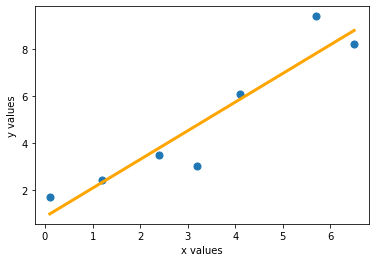

In [146]:
plt.scatter(x_5, y_5, s=50)
plt.plot(x_5, regr.predict(x_5), color='orange', linewidth=3)
plt.xlabel('x values')
plt.ylabel('y values')
plt.show()

In [147]:
# y_hat = theta0 + theta1*x
y_hat = 0.847535148603 + 1.22272646378*x_5
print('Est values y_hat are: \n', y_hat)
print('In comparison, the actual y values are \n', y_5)

Est values y_hat are: 
 [[0.96980779]
 [2.31480691]
 [3.78207866]
 [4.76025983]
 [5.86071365]
 [7.81707599]
 [8.79525716]]
In comparison, the actual y values are 
 [[1.7]
 [2.4]
 [3.5]
 [3. ]
 [6.1]
 [9.4]
 [8.2]]


In [148]:
# Challenge: Write a python function mse(y, y_hat) returns the MSE? Call the mse(y, y_hat)
# function and print out the MSE for the y_hat calculated above. 

def mse(y, y_hat):
    #mse_calc = 1/7 * sum((y - y_hat)**2)
    #mse_calc = (1/y.size) * sum((y - y_hat)**2)
    mse_calc = np.average((y - y_hat)**2, axis=0)
    return mse_calc

In [149]:
print('Manually calculated MSE is:', mse(y_5, y_hat))
print('MSE regression using manual calc is', mean_squared_error(y_5, y_hat))
print('MSE regression is', mean_squared_error(y_5, regr.predict(x_5)))


Manually calculated MSE is: [0.94796558]
MSE regression using manual calc is 0.947965575979458
MSE regression is 0.9479655759794577


In [150]:
nr_thetas = 200
th_0 = np.linspace(start=-1, stop=3, num=nr_thetas)
th_1 = np.linspace(start=-1, stop=3, num=nr_thetas)
plot_t0, plot_t1 = np.meshgrid(th_0, th_1)


In [151]:
plot_cost = np.zeros((nr_thetas, nr_thetas))

for i in range(nr_thetas):
    for j in range(nr_thetas):
        #print(plot_t0[j][i])
        y_hat = plot_t0[i][j] + plot_t1[i][j]*x_5
        plot_cost[i][j] = mse(y_5, y_hat)

print('Shape of plot_t0', plot_t0.shape)
print('Shape of plot_t1', plot_t1.shape)
print('Shape of plot_cost', plot_cost.shape)

Shape of plot_t0 (200, 200)
Shape of plot_t1 (200, 200)
Shape of plot_cost (200, 200)


In [152]:
# Nested loop practice
for i in range(3):
    for j in range(3):
        print(f'value of i is {i} and j is {j}')

value of i is 0 and j is 0
value of i is 0 and j is 1
value of i is 0 and j is 2
value of i is 1 and j is 0
value of i is 1 and j is 1
value of i is 1 and j is 2
value of i is 2 and j is 0
value of i is 2 and j is 1
value of i is 2 and j is 2


C:\Users\prash\AppData\Local\Temp/ipykernel_14400/1181290961.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


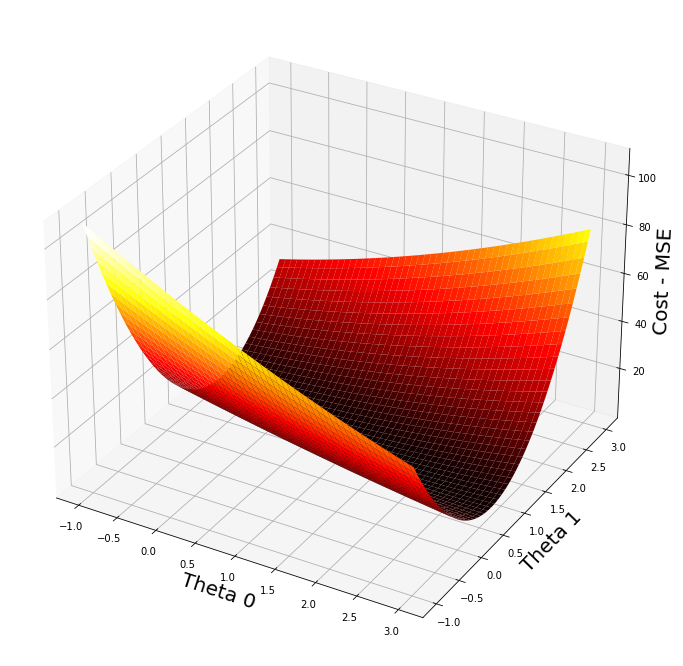

In [153]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.hot)
plt.show()

In [154]:
print('Min value of plot_cost', plot_cost.min())
ij_min = np.unravel_index(indices=plot_cost.argmin(), dims=plot_cost.shape)
print('Min occurs at (i,j):', ij_min)
print('Min MSE for Theta 0 at plot_t0[111][91]', plot_t0[111][91])
print('Min MSE for Theta 1 at plot_t1[111][91]', plot_t1[111][91])

Min value of plot_cost 0.9483826526747164
Min occurs at (i,j): (111, 91)
Min MSE for Theta 0 at plot_t0[111][91] 0.829145728643216
Min MSE for Theta 1 at plot_t1[111][91] 1.2311557788944723


C:\Users\prash\AppData\Local\Temp/ipykernel_14400/3212340844.py:2: DeprecationWarning: 'shape' argument should be used instead of 'dims'
  ij_min = np.unravel_index(indices=plot_cost.argmin(), dims=plot_cost.shape)


## Partial Derivatives of MSE w.r.t. $\theta_0$ and $\theta_1$

## $$\frac{\partial MSE}{\partial \theta_0} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big)$$

## $$\frac{\partial MSE}{\partial \theta_1} = - \frac{2}{n} \sum_{i=1}^{n} \big( y^{(i)} - \theta_0 - \theta_1 x^{(i)} \big) \big( x^{(i)} \big)$$

In [155]:
# x values, y values, array of theta parameters (theta0 at index 0 and theta1 at index 1)
def grad(x, y, thetas):
    n = y.size
    
    # Challenge: Create theta0_slope and theta1_slope to hold slope values from partial derivs
    theta0_slope = (-2/n) * sum(y - thetas[0] - thetas[1]*x)
    theta1_slope = (-2/n) * sum((y - thetas[0] - thetas[1]*x)*x)
    
    #return np.array([theta0_slope[0], theta1_slope[0]])
    #return np.append(arr=theta0_slope, values=theta1_slope)
    return np.concatenate((theta0_slope, theta1_slope), axis=0)

In [156]:
multiplier = 0.01
thetas = np.array([2.9, 2.9])

# Collect data points for scatter plot
plot_vals = thetas.reshape(1, 2)
mse_vals = mse(y_5, thetas[0] + thetas[1]*x_5)

for i in range(1000):
    thetas = thetas - multiplier * grad(x_5, y_5, thetas)
    
    # Append the new values to our numpy arrays
    plot_vals = np.concatenate((plot_vals, thetas.reshape(1, 2)), axis=0)
    mse_vals = np.append(arr=mse_vals, values=mse(y_5, thetas[0] + thetas[1]*x_5))
    
# Results
print('Min occurs at Theta 0:', thetas[0])
print('Min occurs at Theta 1:', thetas[1])
print('MSE is:', mse(y_5, thetas[0] + thetas[1]*x_5))

Min occurs at Theta 0: 0.8532230461743415
Min occurs at Theta 1: 1.2214935332607393
MSE is: [0.94797511]


C:\Users\prash\AppData\Local\Temp/ipykernel_14400/2660784454.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


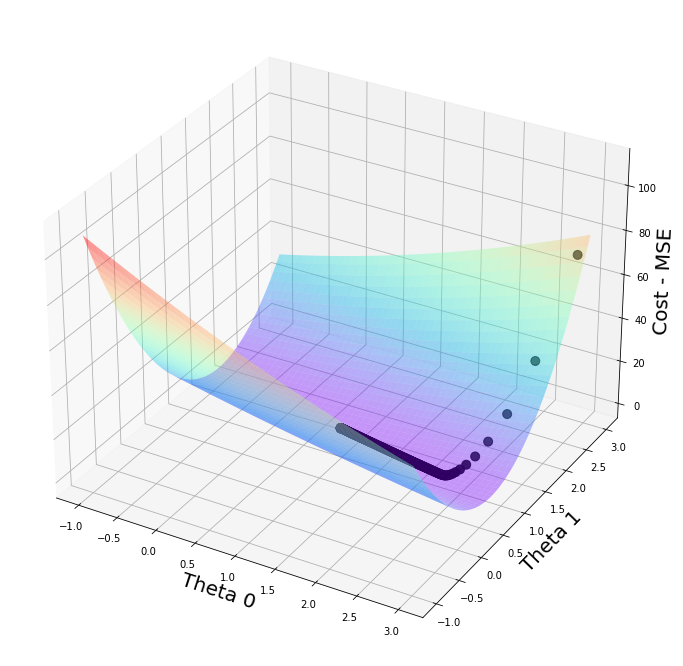

In [157]:
# Plotting MSE
fig = plt.figure(figsize=[16, 12])
ax = fig.gca(projection='3d')

ax.set_xlabel('Theta 0', fontsize=20)
ax.set_ylabel('Theta 1', fontsize=20)
ax.set_zlabel('Cost - MSE', fontsize=20)

ax.scatter(plot_vals[:, 0], plot_vals[:, 1], mse_vals, s=80, color='black')
ax.plot_surface(plot_t0, plot_t1, plot_cost, cmap=cm.rainbow, alpha=0.4)
plt.show()